In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import os
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
import matplotlib.pyplot as plt



In [21]:
# Read the CSV file
train = pd.read_csv("train_2.csv", delimiter=";")
train

,wzrost,wilgotnosc,dni_od_nawiezienia,aktualna_pogoda,czy_roslina_robaczywa,typ_rosliny,pojemnosc_ekwipunku,cena_sprzedarzy,czy_zebrac
0,54,19,15,0,0,0,90,66,0
1,64,63,5,0,0,0,16,4,0
2,93,0,29,0,1,0,77,73,1
3,30,43,23,0,1,0,74,75,1
4,48,30,10,0,0,0,39,23,0
...,...,...,...,...,...,...,...,...,...
196,93,77,24,0,1,0,41,59,1
197,74,94,21,0,1,0,17,39,1
198,63,63,26,0,1,0,67,2,1
199,65,73,1,0,0,0,74,40,0


In [22]:
x_train = train.drop('czy_zebrac',axis=1)
y_train = train['czy_zebrac']

In [23]:
d_tree = DecisionTreeClassifier()
d_tree = d_tree.fit(x_train,y_train)

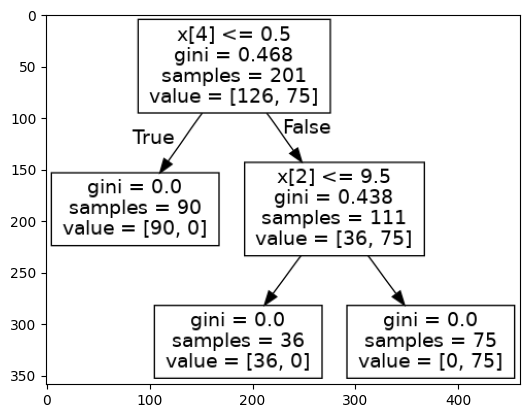

In [24]:
# Save the decision tree model as a pickle file in the script's folder
pickle.dump(d_tree, open('tree.plk', 'wb'))

# Export the decision tree as DOT data
data = tree.export_graphviz(d_tree, out_file=None)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(data)

# Save the graph as a PNG image in the script's folder
graph.write_png(os.path.join('.', 'mytree.png'))

# Read the PNG image
img = pltimg.imread(os.path.join('.', 'mytree.png'))

# Display the image
imgplot = plt.imshow(img)
plt.show()
